1. 부산 기온 데이터 수집

2. 부산에서 가장 더웠던 날은? 검색

3. 매년 크리스마스의 최고 기온과 최저 기온 추이 : plot

4. 월별 기온 데이터 : boxplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 부산 기온 데이터 수집

### 데이터 csv로 읽기

In [92]:

df = pd.read_csv('./data/ta_20220921110137.csv',header=6)
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-08-01,159,26.2,22.7,30.3
1,1904-08-02,159,25.5,23.4,30.2
2,1904-08-03,159,24.9,23.1,29.2
3,1904-08-04,159,23.9,21.9,28.0
4,1904-08-05,159,23.7,21.9,27.5
...,...,...,...,...,...
43145,2022-09-16,159,25.1,22.5,29.2
43146,2022-09-17,159,25.8,23.2,30.4
43147,2022-09-18,159,26.4,23.0,31.0
43148,2022-09-19,159,24.1,19.0,28.8


In [93]:
#컬럼명 변경
df.rename(columns={'최고기온(℃)':'최고기온'},inplace=True)
df.rename(columns={'최저기온(℃)':'최저기온'},inplace=True)
df.rename(columns={'평균기온(℃)':'평균기온'},inplace=True)
df

,날짜,지점,평균기온,최저기온,최고기온
0,1904-08-01,159,26.2,22.7,30.3
1,1904-08-02,159,25.5,23.4,30.2
2,1904-08-03,159,24.9,23.1,29.2
3,1904-08-04,159,23.9,21.9,28.0
4,1904-08-05,159,23.7,21.9,27.5
...,...,...,...,...,...
43145,2022-09-16,159,25.1,22.5,29.2
43146,2022-09-17,159,25.8,23.2,30.4
43147,2022-09-18,159,26.4,23.0,31.0
43148,2022-09-19,159,24.1,19.0,28.8


In [94]:
#결측치 삭제
df.dropna(inplace=True)

In [95]:
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

# 2. 부산에서 가장 더웠던 날은? 검색

In [176]:

max_df = df[['날짜','최고기온']]
type(max_df)

pandas.core.frame.DataFrame

In [83]:
max_df[max_df['최고기온']==max_df['최고기온'].max()]

,날짜,최고기온
40921,2016-08-14,37.3


In [84]:
print(f'부산에서 가장 더웠던 날은 {max_df.values[40921][0]} 이며 온도는 {max_df["최고기온"].max()} (℃) 였습니다.')

부산에서 가장 더웠던 날은 2016-08-16 이며 온도는 37.3 (℃) 였습니다.


# 3. 매년 크리스마스의 최고 기온과 최저 기온 추이 : plot

In [69]:
df[df['날짜'].str.contains('12-25')][['날짜','최고기온','최저기온']]

,날짜,최고기온,최저기온
146,1904-12-25,7.7,-1.5
511,1905-12-25,14.8,10.5
876,1906-12-25,3.8,-4.8
1241,1907-12-25,13.9,5.3
1607,1908-12-25,9.1,-0.6
...,...,...,...
41419,2017-12-25,7.5,0.1
41784,2018-12-25,9.9,0.2
42149,2019-12-25,16.3,5.4
42515,2020-12-25,7.6,0.2


### 데이터 추출하기

In [70]:
xmas_df=df[df['날짜'].str.contains('12-25')][['날짜','최고기온','최저기온']]
xmas_df

,날짜,최고기온,최저기온
146,1904-12-25,7.7,-1.5
511,1905-12-25,14.8,10.5
876,1906-12-25,3.8,-4.8
1241,1907-12-25,13.9,5.3
1607,1908-12-25,9.1,-0.6
...,...,...,...
41419,2017-12-25,7.5,0.1
41784,2018-12-25,9.9,0.2
42149,2019-12-25,16.3,5.4
42515,2020-12-25,7.6,0.2


### plot 그래프 그리기

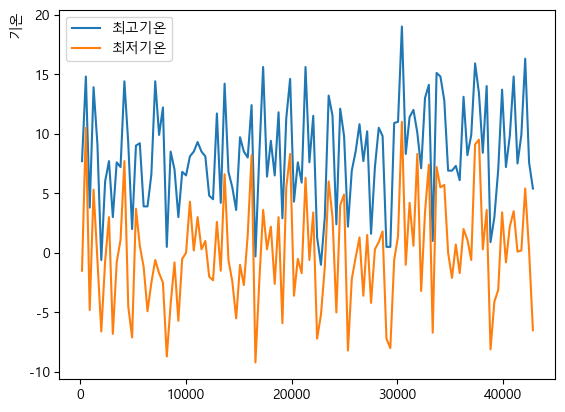

In [81]:

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

plt.plot(xmas_df['최고기온'],label='최고기온')
plt.plot(xmas_df['최저기온'],label='최저기온')
plt.ylabel('기온',loc='top')
plt.legend()

# 4. 월별 기온 데이터 : boxplot

### '날짜' 데이터 형변환 후 '월' 컬럼 만들기

In [101]:
#형 변환
df['날짜']=df['날짜'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43148 entries, 0 to 43149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      43148 non-null  datetime64[ns]
 1   지점      43148 non-null  int64         
 2   평균기온    43148 non-null  float64       
 3   최저기온    43148 non-null  float64       
 4   최고기온    43148 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.0 MB


In [102]:
#컬럼 생성

df['월']=df['날짜'].dt.month
df

,날짜,지점,평균기온,최저기온,최고기온,월
0,1904-08-01,159,26.2,22.7,30.3,8
1,1904-08-02,159,25.5,23.4,30.2,8
2,1904-08-03,159,24.9,23.1,29.2,8
3,1904-08-04,159,23.9,21.9,28.0,8
4,1904-08-05,159,23.7,21.9,27.5,8
...,...,...,...,...,...,...
43145,2022-09-16,159,25.1,22.5,29.2,9
43146,2022-09-17,159,25.8,23.2,30.4,9
43147,2022-09-18,159,26.4,23.0,31.0,9
43148,2022-09-19,159,24.1,19.0,28.8,9


In [145]:
m_list=[]
x_m_list=[]
for i in range(1,13) :
    m_list.append(df.loc[df['월']==i,'평균기온'])
    x_m_list.append(f'{i}월')


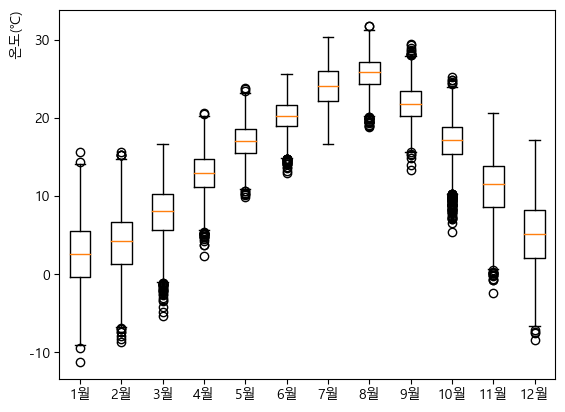

In [175]:

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

plt.boxplot(m_list)

plt.xticks(range(1,13),x_m_list)
plt.ylabel('온도(℃)',loc='top')

plt.show()